<a href="https://colab.research.google.com/github/jtschowdary1812/EDA/blob/main/21BDS0042_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/GSS7402.csv"
df = pd.read_csv(data_url)

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       9120 non-null   int64  
 1   kids           9120 non-null   int64  
 2   age            9120 non-null   int64  
 3   education      9120 non-null   int64  
 4   year           9120 non-null   int64  
 5   siblings       9120 non-null   int64  
 6   agefirstbirth  3312 non-null   float64
 7   ethnicity      9120 non-null   object 
 8   city16         9120 non-null   object 
 9   lowincome16    9120 non-null   object 
 10  immigrant      9120 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 783.9+ KB
None
          rownames         kids          age    education         year  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean   4560.500000     2.076096    46.082018    12.635088  1990.288596   
std    2632.861561     1.80509

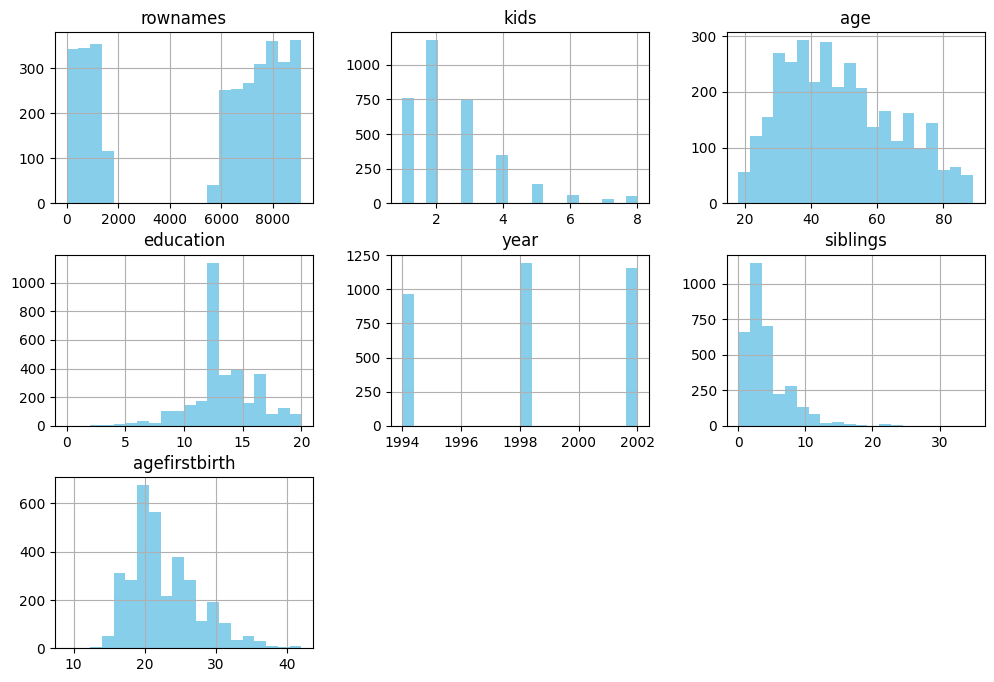

In [4]:
df.dropna(inplace=True)

num_cols = df.select_dtypes(include=['number']).columns
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.show()

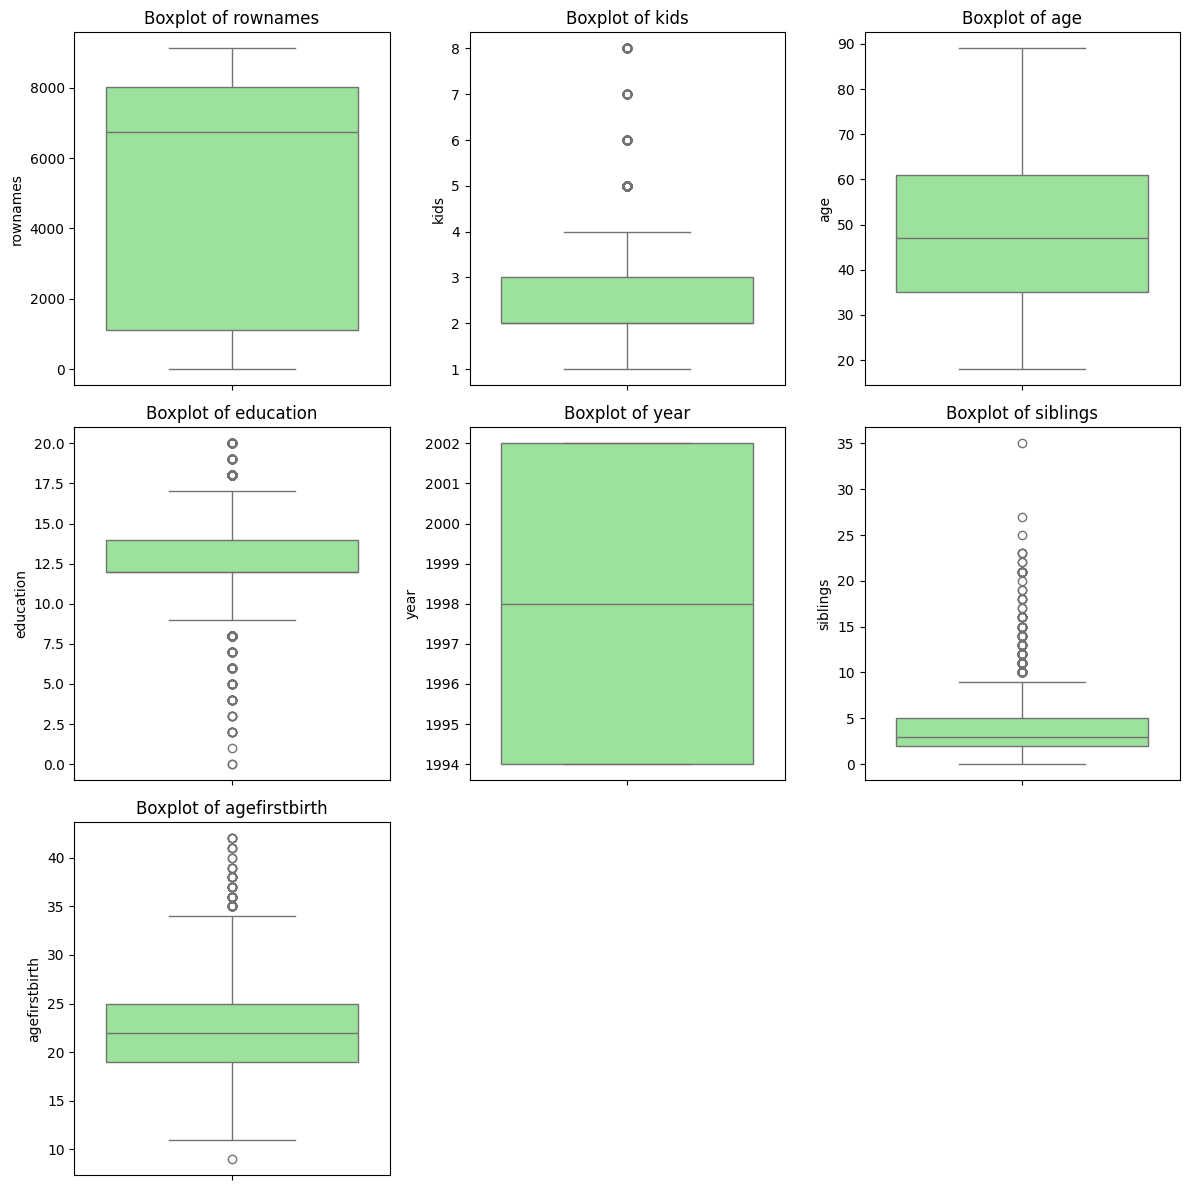

In [6]:
num_cols_count = len(num_cols)
rows = (num_cols_count // 3) + (num_cols_count % 3 > 0)
plt.figure(figsize=(12, 4 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


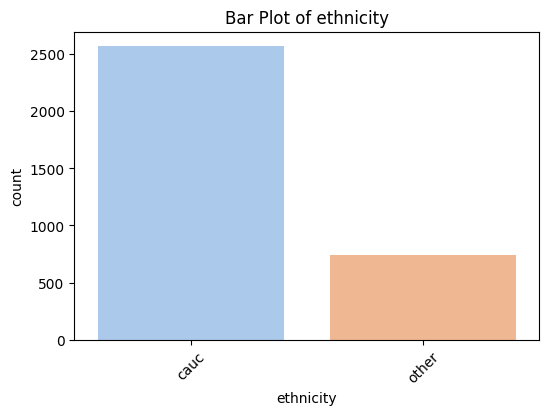

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


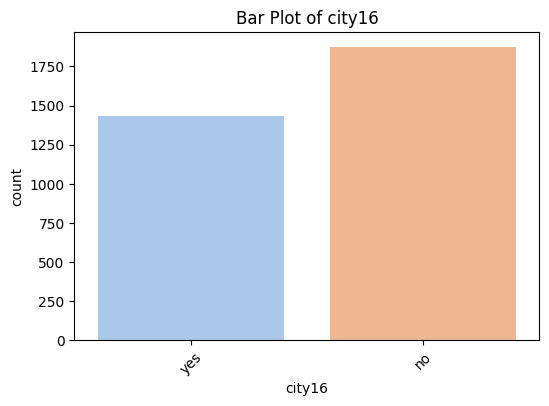

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


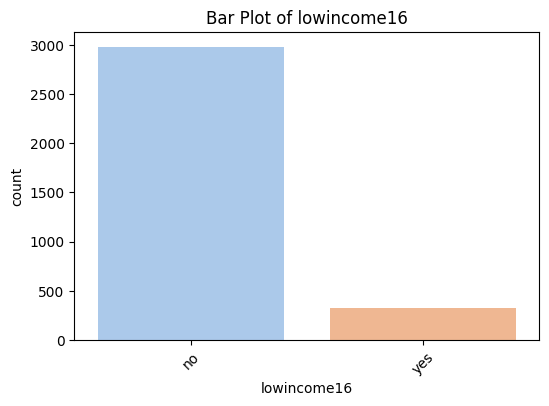

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


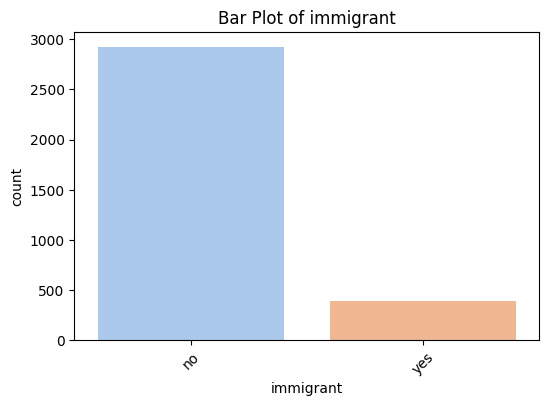

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

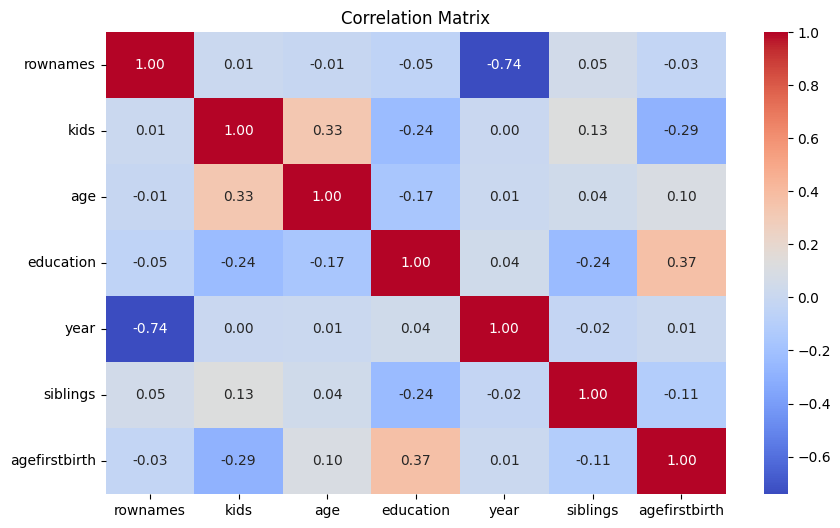

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

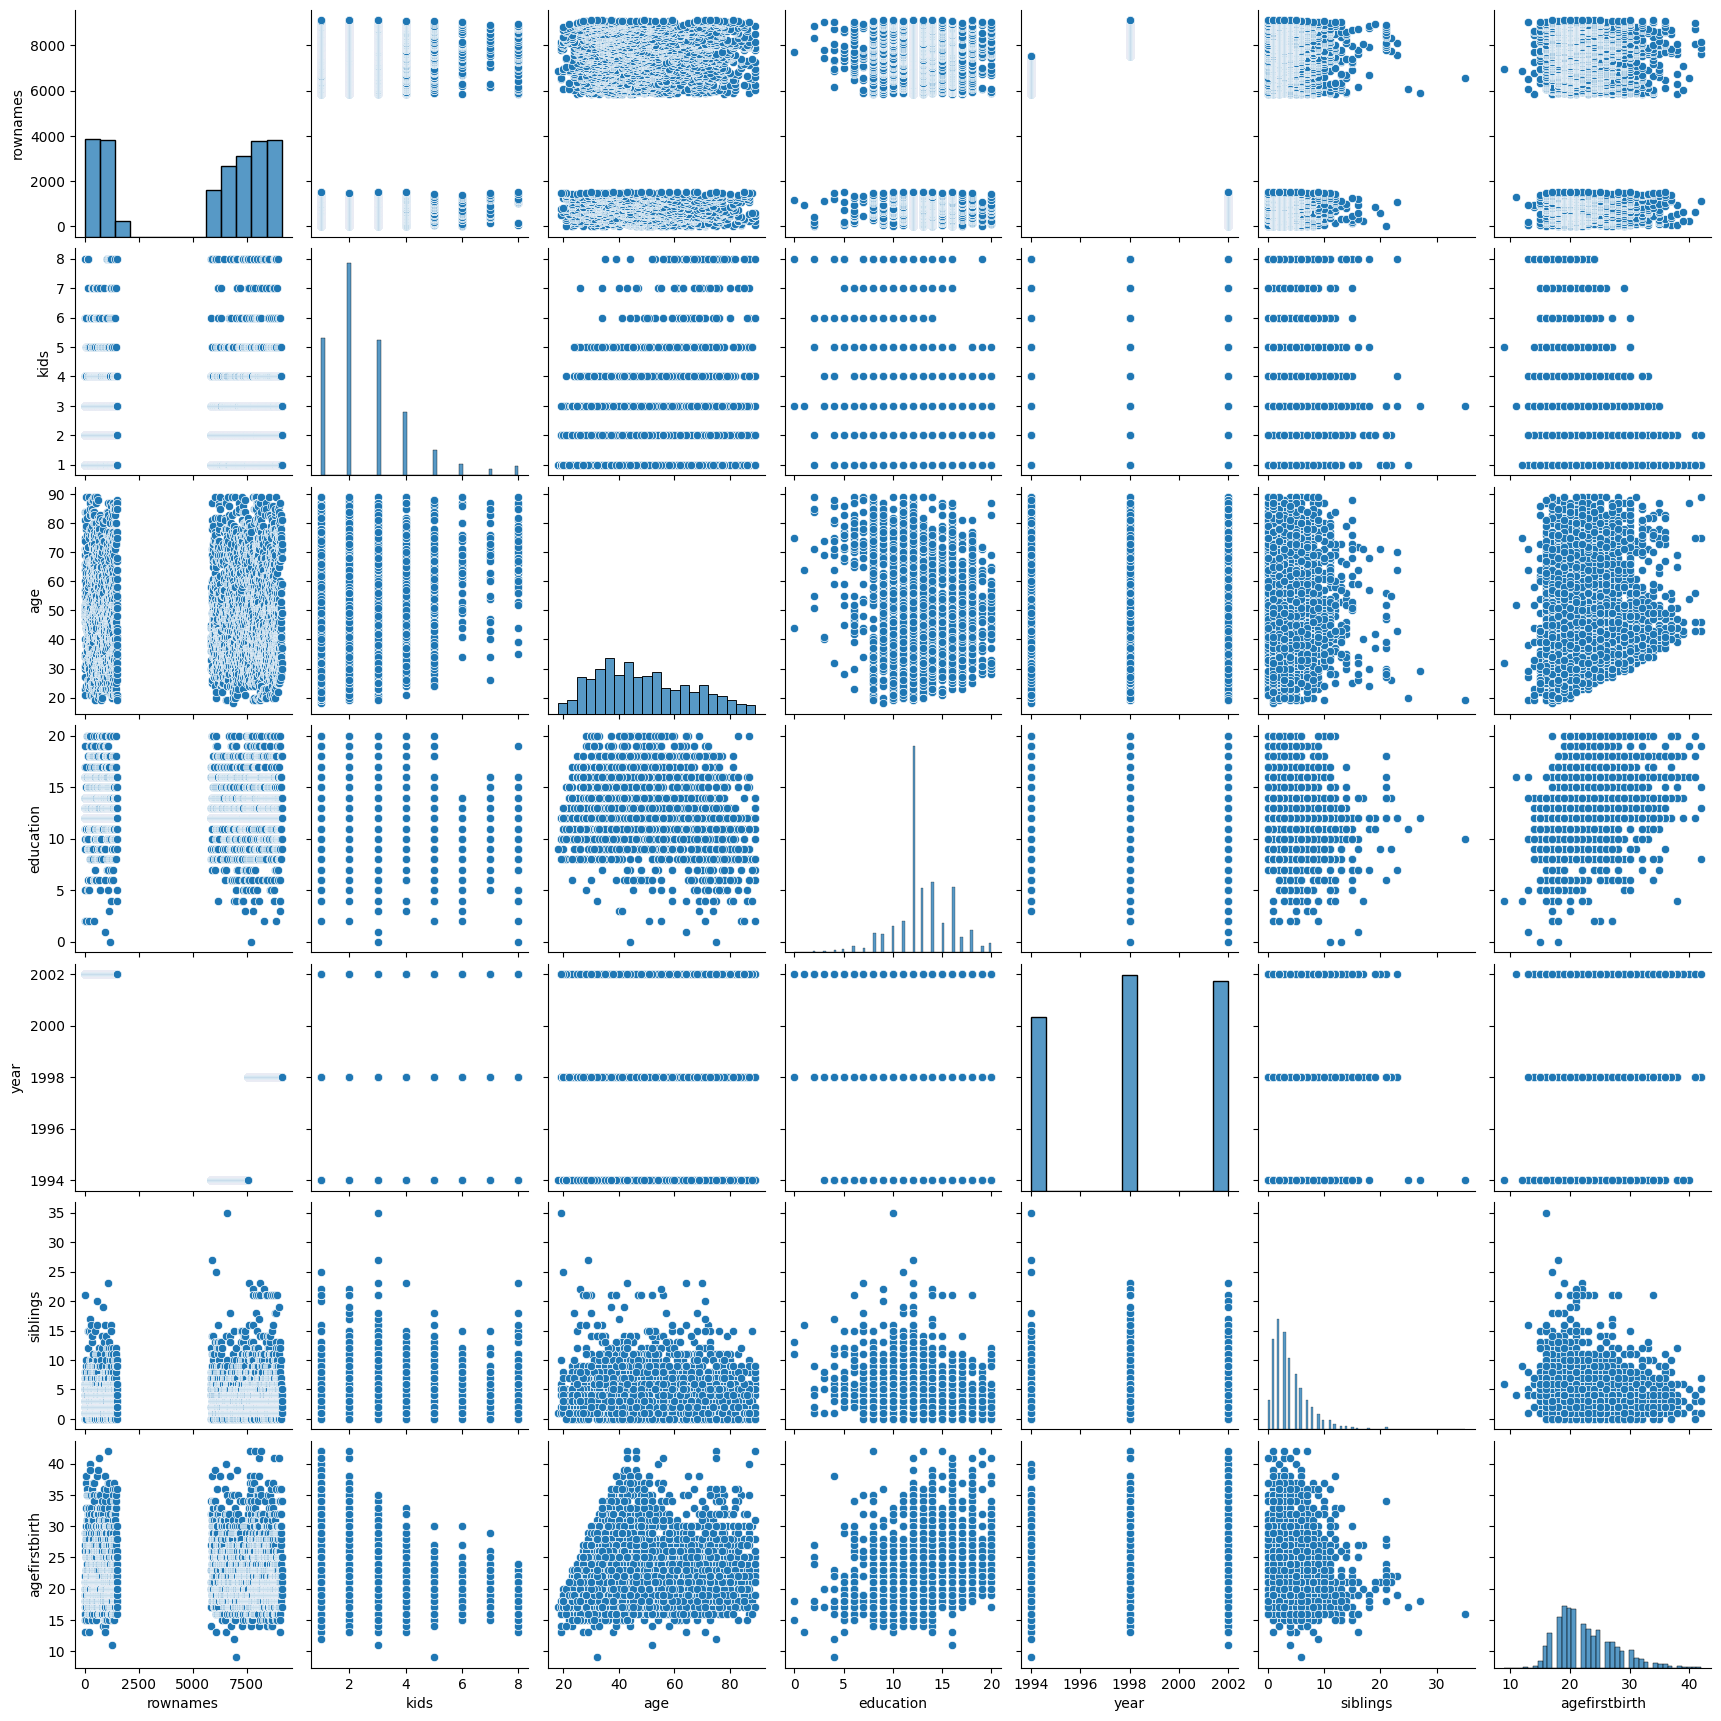

In [10]:
sns.pairplot(df[num_cols])
plt.show()

In [11]:
df.to_csv("cleaned_GSS7402.csv", index=False)
